# Script contents:
1. Importing libraries and dataframe
2. Subsetting; Data smoothening
3. Time series analysis: decomposition
4. Testing for stationarity
5. Stationarizing the data:differencing

## 1. Importing libraries and dataframe

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
#for the created graphs to be displayed in the notebook
%matplotlib inline

In [3]:
# Defining path
path=r'C:\Users\akul_\OneDrive\Documents\Tarishi\CF Data analysis bootcamp\Achievement 6\Global aqi and respiratory health outcomes'

In [4]:
df_aqi=df_aqi=pd.read_csv(os.path.join(path, 'Data', 'Prepared data', 'air_quality_cleaned.csv'),index_col=False)

In [5]:
df_aqi.head()

,city,date,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,population_density,hospital_capacity,name
0,Los Angeles,2020-01-01,65,34.0,52.7,2.2,38.5,33.5,33,5,Rural,1337,United States
1,Beijing,2020-01-02,137,33.7,31.5,36.7,27.5,-1.6,32,4,Urban,1545,China
2,London,2020-01-03,266,43.0,59.6,30.4,57.3,36.4,25,10,Suburban,1539,United Kingdom
3,Mexico City,2020-01-04,293,33.7,37.9,12.3,42.7,-1.0,67,10,Urban,552,Mexico
4,Delhi,2020-01-05,493,50.3,34.8,31.2,35.6,33.5,72,9,Suburban,1631,India


In [6]:
## there were multiple index columns which needed to be dropped 
df_aqi = df_aqi.loc[:, ~df_aqi.columns.str.contains('^Unnamed')]

In [7]:
df_aqi.head()

,city,date,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,population_density,hospital_capacity,name
0,Los Angeles,2020-01-01,65,34.0,52.7,2.2,38.5,33.5,33,5,Rural,1337,United States
1,Beijing,2020-01-02,137,33.7,31.5,36.7,27.5,-1.6,32,4,Urban,1545,China
2,London,2020-01-03,266,43.0,59.6,30.4,57.3,36.4,25,10,Suburban,1539,United Kingdom
3,Mexico City,2020-01-04,293,33.7,37.9,12.3,42.7,-1.0,67,10,Urban,552,Mexico
4,Delhi,2020-01-05,493,50.3,34.8,31.2,35.6,33.5,72,9,Suburban,1631,India


In [8]:
df_aqi.shape

(2192, 13)

## 2. Subsetting

In [9]:
df_aqi['date'].max()

'2025-12-31'

In [10]:
df_aqi['date'].min()

'2020-01-01'

#### In the second task, I had dropped the date beyond 2025, as they were imputed in the dataset for missing/ambigious values. For this analysis, however, we can further create a subset with max date 2025-05-31.

In [11]:
df_aqi_sub = df_aqi.loc[df_aqi['date'] <= '2025-05-31']

In [12]:
df_aqi_sub.shape

(1978, 13)

#### 214 values were dropped from the new subset

### Reset to set date as index. 

In [13]:
df_aqi_sub.dtypes

city                    object
date                    object
aqi                      int64
pm2_5                  float64
pm10                   float64
no2                    float64
o3                     float64
temperature            float64
humidity                 int64
hospital_admissions      int64
population_density      object
hospital_capacity        int64
name                    object
dtype: object

In [14]:
from datetime import datetime
## change the date to datetime format
df_aqi_sub['date'] = pd.to_datetime(df_aqi_sub['date'])
df_aqi_sub.set_index('date',inplace=True)

In [15]:
df_aqi_sub.head()

,city,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,population_density,hospital_capacity,name
date,,,,,,,,,,,,
2020-01-01,Los Angeles,65,34.0,52.7,2.2,38.5,33.5,33,5,Rural,1337,United States
2020-01-02,Beijing,137,33.7,31.5,36.7,27.5,-1.6,32,4,Urban,1545,China
2020-01-03,London,266,43.0,59.6,30.4,57.3,36.4,25,10,Suburban,1539,United Kingdom
2020-01-04,Mexico City,293,33.7,37.9,12.3,42.7,-1.0,67,10,Urban,552,Mexico
2020-01-05,Delhi,493,50.3,34.8,31.2,35.6,33.5,72,9,Suburban,1631,India


### Create a new dataframe keeping only PM2.5 for Delhi, which has the worst aqi.


In [29]:
df_delhi_pm25 = df_aqi_sub[df_aqi_sub['city'] == 'Delhi'][['pm2_5']]

In [30]:
df_pm25 = df_delhi_pm25[['pm2_5']].copy()


In [31]:
df_pm25.head()

,pm2_5
date,
2020-01-05,50.3
2020-01-09,44.9
2020-01-16,34.2
2020-01-18,44.4
2020-01-26,40.3


### Since the aqi is updated daily, we need to do data smoothening. I have taken the monthly average in this case.

### Data smoothening

In [32]:
## data smoothening monthly
df_pm25['pm2_5_smooth'] = df_pm25['pm2_5'].rolling(window=30).mean()

<Figure size 1000x500 with 0 Axes>

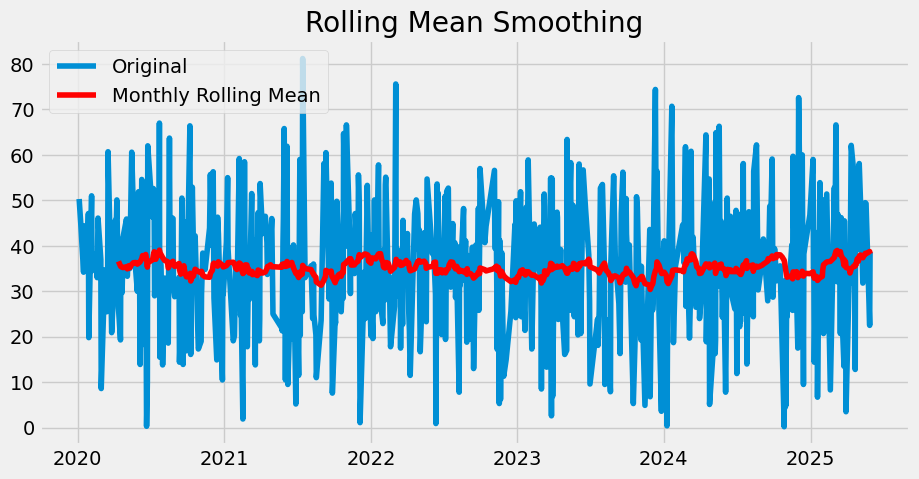

In [33]:
plt.figure(figsize=(10,5))
plt.plot(df_pm25.index, df_pm25['pm2_5'], label='Original')
plt.plot(df_pm25.index, df_pm25['pm2_5_smooth'], color='red', label='Monthly Rolling Mean')
plt.legend()
plt.title('Rolling Mean Smoothing')
plt.show()

### The 30 day mean still has a lot of noise depicted in the plot. The data is further smoothened to quarterly mean. 

In [34]:
## quarterly smoothening
df_quarterly = df_pm25['pm2_5'].resample('Q').mean()

In [35]:
df_quarterly = df_quarterly.to_frame(name='pm2_5')

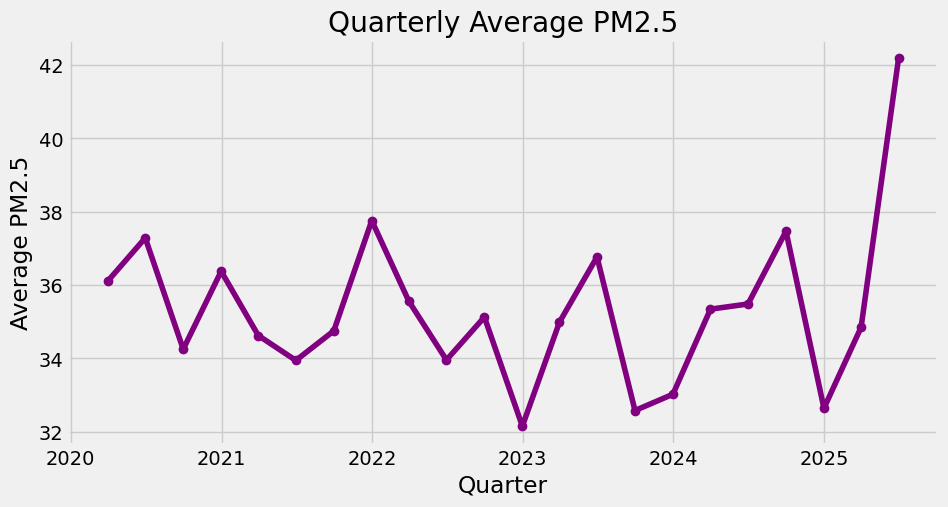

In [36]:
plt.figure(figsize=(10,5))
plt.plot(df_quarterly.index, df_quarterly, marker='o', color='purple')
plt.title('Quarterly Average PM2.5')
plt.xlabel('Quarter')
plt.ylabel('Average PM2.5')
plt.grid(True)
plt.show()

## 3. Time series analysis:decomposition

In [37]:
decomposition = sm.tsa.seasonal_decompose(df_quarterly, model='additive')

In [38]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

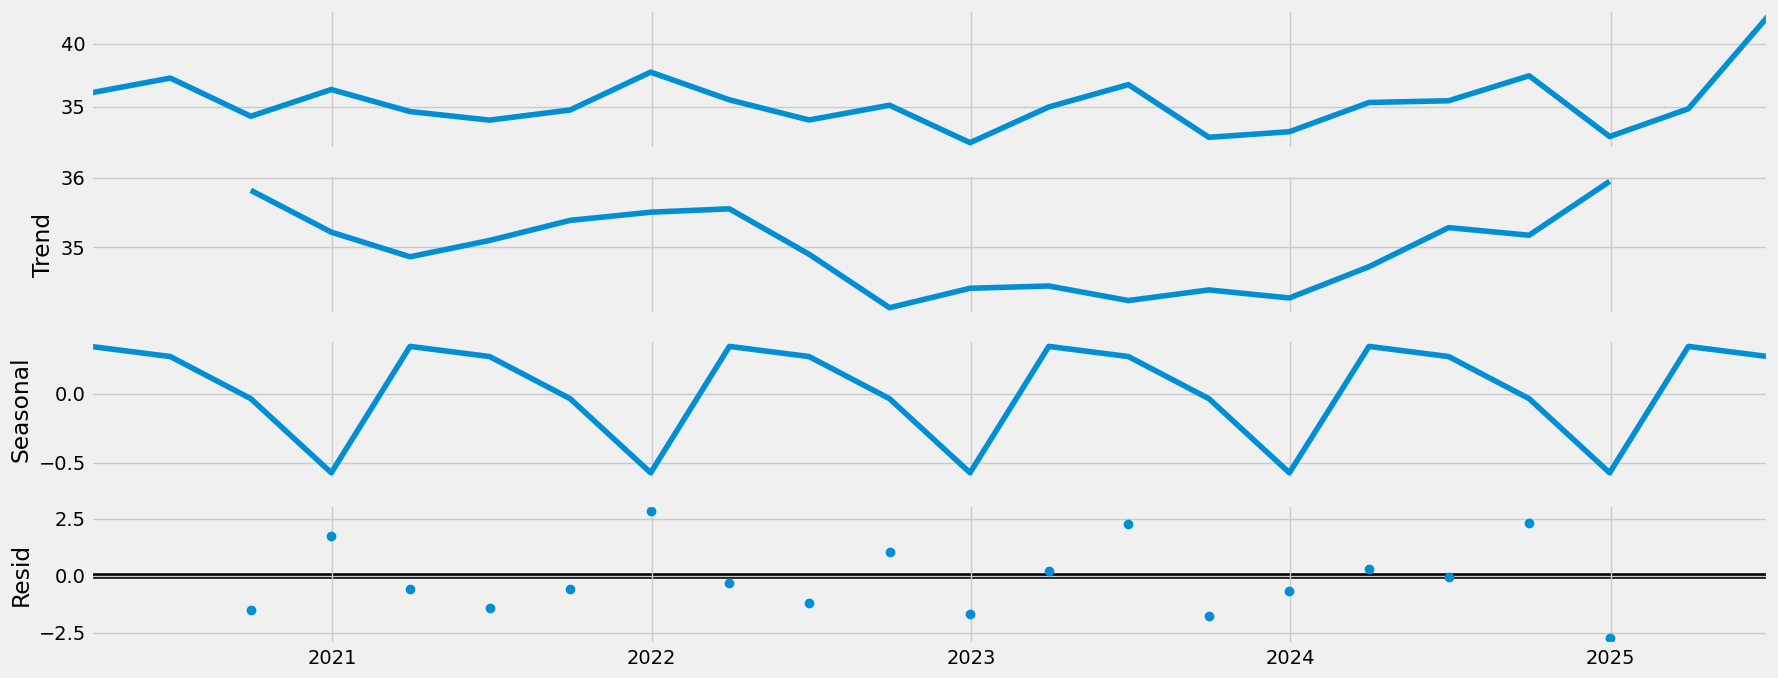

In [39]:
# Plot the separate components

decomposition.plot()
plt.show()

### The first line-level is the actual overall qurterly mean of the original series, while trend is the smoothened long term mean. It shows a slight downward dip until 2022 and then rises again gradually. It shows small changes over time. The seasonality shows a repeated quarterly rise and fall in pm2.5 levels across all the years. It rises in Q2 and Q3 and then falls again in Q4. It is propably due to increasing temperatures when the pm2.5 levels increase.

## 4. Testing for stationarity

### Dicker-fuller test for stationarity

In [40]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)
    


In [41]:
# Apply the test using the function on the time series
dickey_fuller(df_quarterly['pm2_5'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.399237
p-value                         0.582642
Number of Lags Used             9.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


#### The test statistic is greater than the p-value, which means we cannot reject our null hypothesis. This means that the data is not stationary

### Autocorrelation

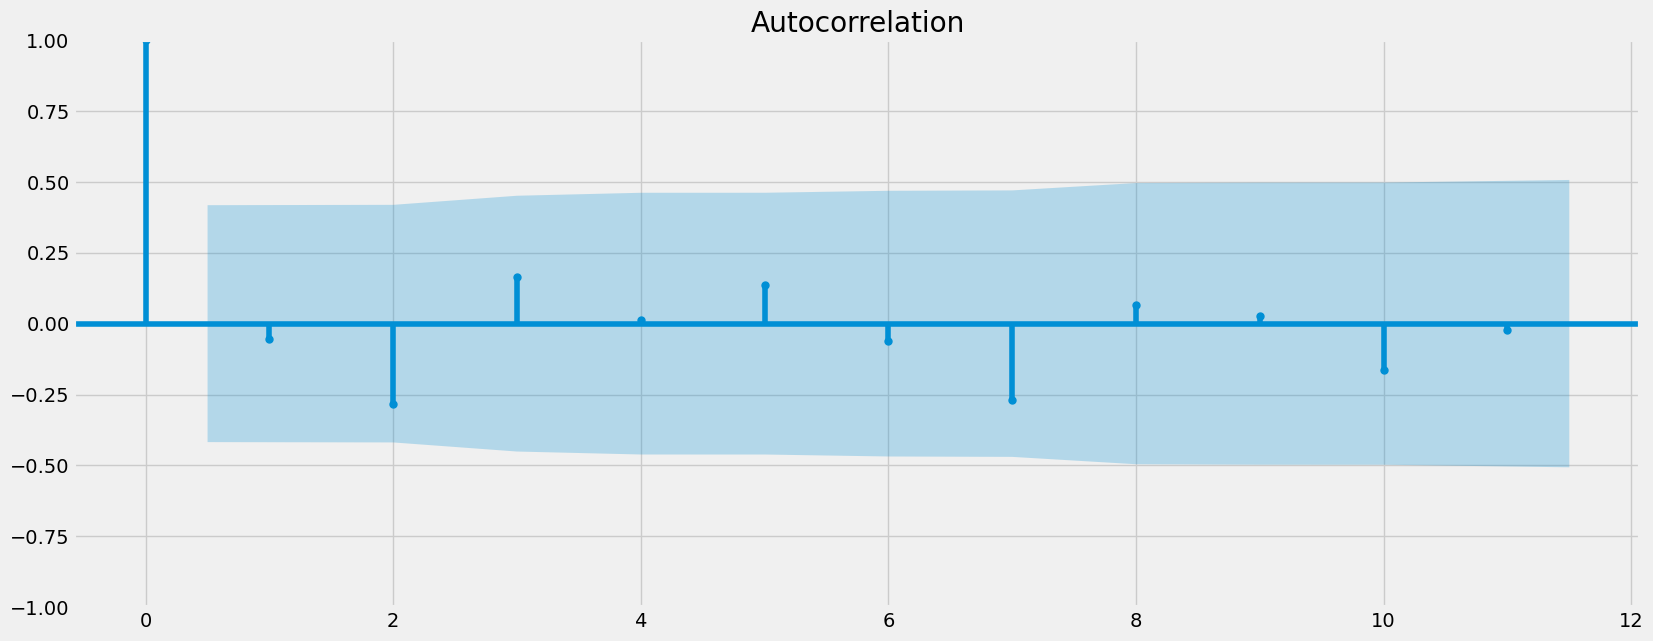

In [42]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_quarterly)
plt.show()

## 5. Stationarizing the data

In [43]:
df_diff = df_quarterly - df_quarterly.shift(1) 

In [44]:
df_diff.dropna(inplace = True)

In [45]:
df_diff.head()

,pm2_5
date,
2020-06-30,1.177208
2020-09-30,-3.031838
2020-12-31,2.123222
2021-03-31,-1.750194
2021-06-30,-0.678187


In [46]:
df_diff.columns

Index(['pm2_5'], dtype='object')

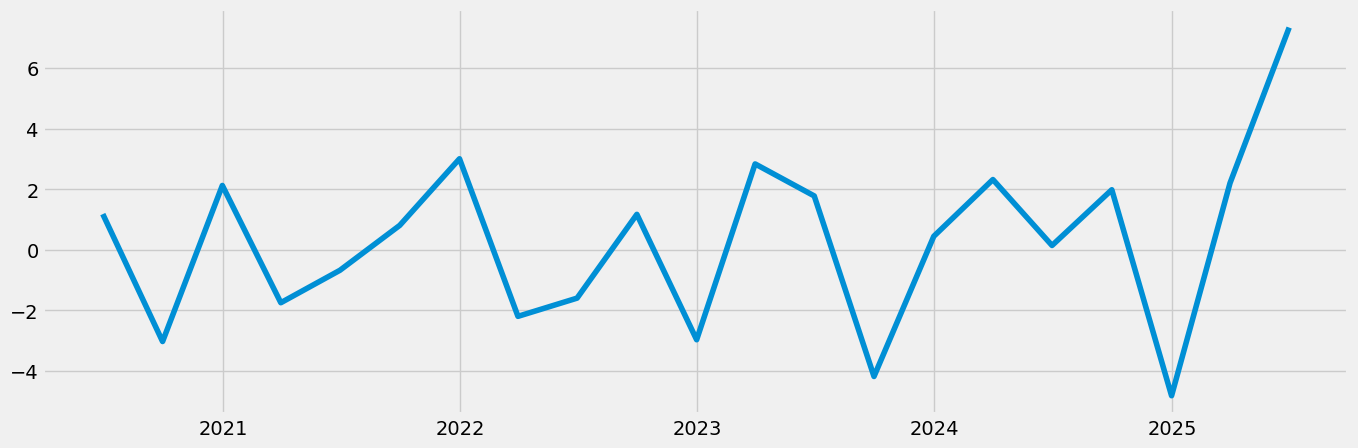

In [47]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff)
plt.show()

In [48]:
dickey_fuller(df_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.949167
p-value                         0.309296
Number of Lags Used             4.000000
Number of Observations Used    16.000000
Critical Value (1%)            -3.924019
Critical Value (5%)            -3.068498
Critical Value (10%)           -2.673893
dtype: float64


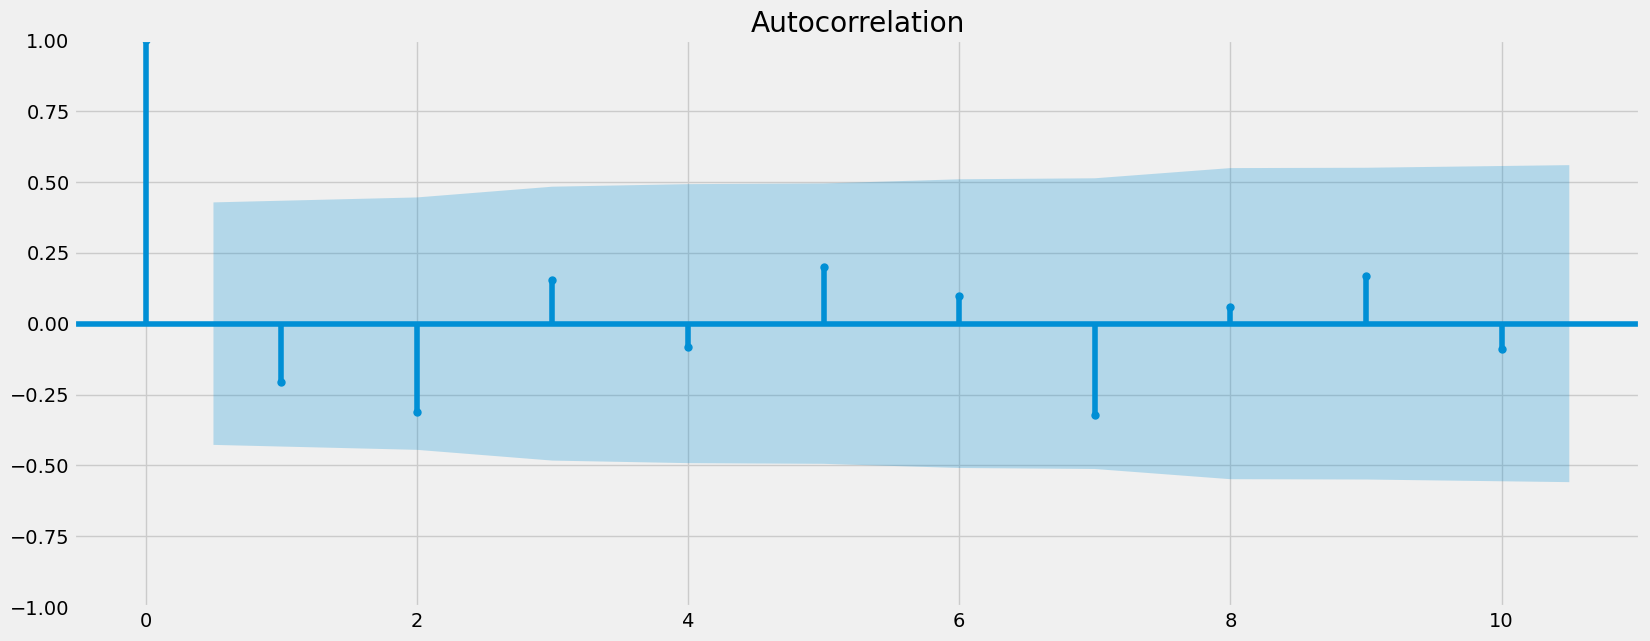

In [49]:
plot_acf(df_diff)
plt.show()

### After perfroming differencing, the p-value is still high and the test statistic is still greater than the 5% critical value. This means that another round of differencing needs to be done.

In [50]:
df_diff_new = df_diff - df_diff.shift(1) 

In [51]:
df_diff_new.dropna(inplace = True)

In [52]:
df_diff_new.head()

,pm2_5
date,
2020-09-30,-4.209046
2020-12-31,5.155060
2021-03-31,-3.873416
2021-06-30,1.072006
2021-09-30,1.482742


In [53]:
df_diff_new.columns

Index(['pm2_5'], dtype='object')

In [54]:
dickey_fuller(df_diff_new)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.983373
p-value                         0.000024
Number of Lags Used             3.000000
Number of Observations Used    16.000000
Critical Value (1%)            -3.924019
Critical Value (5%)            -3.068498
Critical Value (10%)           -2.673893
dtype: float64


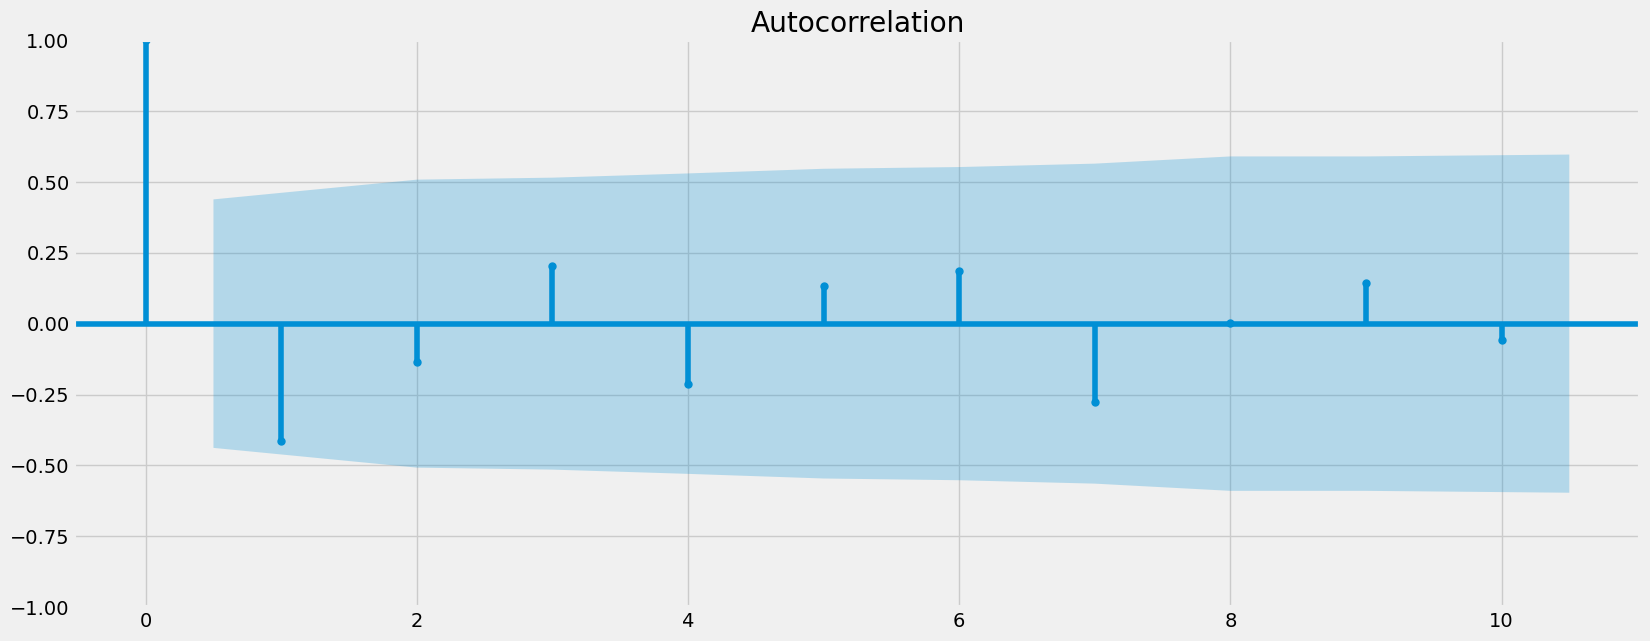

In [55]:
plot_acf(df_diff_new)
plt.show()

### After second round of differencing, the p value is less than 0.05 and the test statistic is less than the 5% significance. Thus, we can reject the null hypothesis. This means that the data is now stationary and can be used for forecasting.

In [56]:
# export the data 
df_diff_new.to_csv(os.path.join(path,'Data','Prepared data', 'time_series_data.csv'))